## 実践機械学習　第８章　回帰：レコメンドの改良
本の内容に自分なりの補足を付けてやってみる。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import sparse
from os import path

データは http://www.grouplens.org/system/files/ml-100k.zip　からダウンロードして解凍。解凍すると、以下のようになっている。

In [5]:
ls ../ML_book_data/ml-100k/

README        u.genre       u.user        u2.test       u4.test       ua.test
allbut.pl*    u.info        u1.base       u3.base       u5.base       ub.base
mku.sh*       u.item        u1.test       u3.test       u5.test       ub.test
u.data        u.occupation  u2.base       u4.base       ua.base


In [25]:
data = np.loadtxt("../ML_book_data/ml-100k/u.data")
ij = data[:, :2]
ij -= 1  # original data is in 1-based system
values = data[:, 2]
reviews = sparse.csc_matrix((values, ij.T)).astype(float)
imagedata = reviews[:200,:200].todense()

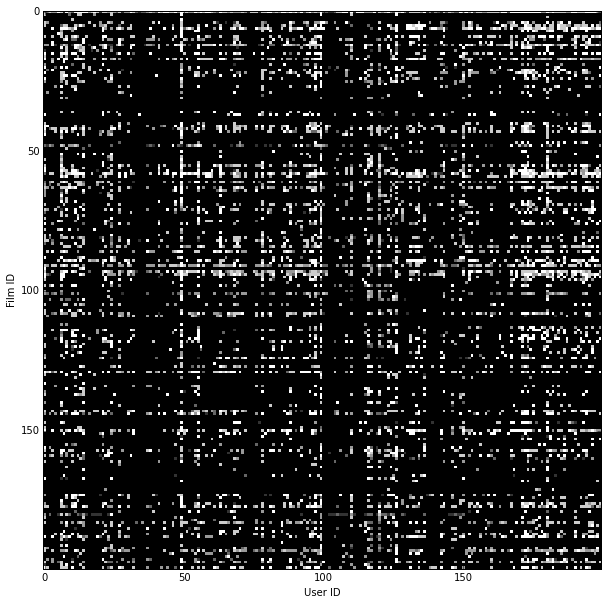

In [29]:
fig =plt.figure(figsize=(16,10))
plt.gray()
plt.imshow(imagedata[:200, :200], interpolation='nearest')
plt.xlabel('User ID')
plt.ylabel('Film ID')
plt.savefig('Figure_08_03_DataMatrix.png')

図8-1. 黒いところがデータがない箇所。白くなるにつれて見た映画のRatingが高い箇所。黒が多く、スパースなデータになっている事が分かる。

## 相関係数の計算

In [31]:
def all_correlations(bait,target):
    return np.array([np.correcoef(bait,c)[0,1] for c in target])

In [34]:
def estimate(user,rest):
    bu = user > 0
    br = rest > 0
    ws = all_correlations(bu,br)
    selected = ws.argsort()[-100:]
    estimates = rest[selected].mean(0)
    estimates /= (.1+br[selected].mean(0))